# ASSIGNMENT - LOAN APPROVAL MODELING


A Housing Finance Company offers home loans for low-income housing. They have presence across all urban, semi urban and rural areas. When customer applies for home loan, the company validates the customer eligibility for loan. They want to automate the loan eligibility process based on customer details provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History etc.

The training data provided with the problem statement gives approval status of past applications. The following features are included

|Feature|	Description|
|:-|-:|
|Loan_ID|	        Unique Loan ID|
|Gender |	        Male/ Female |
|Married| 	        Applicant married (Y/N)| 
|Dependents| 	    Number of dependents| 
|Education |	    Applicant Education (Graduate/Under Graduate)| 
|Self_Employed|     Self-employed (Y/N) |
|ApplicantIncome| 	Applicant income |
|CoapplicantIncome| Applicant income| 
|LoanAmount 	|   Loan amount in thousands| 
|Loan_Amount_Term| 	Term of loan in months| 
|Credit_History| 	Credit history meets guidelines| 
|Property_Area|	    Urban/ Semi Urban/ Rural|
|Loan_Status|	    Loan approved (Y/N) - Target (Class) Variable|



Aim of the assignment is to  

•	Building a Predictive Model  
•	Evaluate the model.  
•	Refine the model, as appropriate  


You need to  

a)	Select a method for performing the analytic task  
b)	Carry out descriptive summarization of data and make observations  
c)	Identify relevant, irrelevant attributes for building model.   
d)	Perform appropriate data transformations with justifications  
e)	Generate new features if needed  
f)	Carry out the chosen analytic task. Show results including intermediate results, as needed  
g)	Evaluate the solutions  
h)	Look for refinement opportunities  


***Solution:***    
The given problem statement indicates it is a classification problem. A classification problem deals with predicting the discrete values based on a given set of independent variable(s). Classification can be of two categories:  
- Binary classification:  
&nbsp;The tasks deals with predicting data into either of two given classes.  
&nbsp;Eg:classifying gender as female or male  
    
- Multiclass Classification:  
&nbsp;The tasks deals with predicting data into three or more given classes.  
&nbsp;Eg:classifying fruits into Apples, Oranges, pears etc  

Loan Approval is a binary classification problem where 'Loan_Status' is classified as 'Yes' or 'No' i.e. 'Yes' indicates loan approved and "no' indicates loan is not approved for the applicant

The binary classification problem can be solved by any of classification techniques like:
1. Logistic Regression
2. Decision Tree
3. Random Forests  

***Hypothesis Generation:***  
Factors that may affect the loan approval include:  
i. The applicant having higher salary has greater chance of loan approval    
ii. Applicant being a graduate has a better chance of loan approval  
iii. Applicant having lesser dependents have a high probability of loan approval  
iv. There is a higher chances of getting loan approval when loan amount is lesser  
v. There is a higher chances of getting loan approval when loan term is shorter  
vi. If the credit history is higher then chance of getting approved loan is higher  
vii. If the EMI amount is small, then chance of getting loan approval is higher  

## a)Select a method for performing the analytic task##  

***Answer:***    
The Exploratory Data Analysis(EDA) method will be used to perform the analytic task as:  
-  EDA helps cleanup the data set  
-  EDA gives better understanding of varaibales and relationships between the varaiables for the given classification problem

## **f) Carry out the chosen analytic task. Show results including intermediate results, as needed** ##  

*** Answer:***
Exploratory Data Analysis was choosen to perform the analytic task.

Main components of EDA used to perform analytics task are:  
1. Understanding the dataset  
2. Cleaning the dataset  
3. Analysing the relationship between the variables 

**Understanding the dataset:**  
The input dataset consists of 13 data columns and 614 row entries.'Loan_Status' is response variable and rest of variables are used to decide whether the loan is approved or not. The variables , types and sub types are described below:  

|Variables|Type Of Variables| Sub-Type Of Variables| Description|
|:-| -:| :- | :- |
|Loan_ID|Numerical|Discrete|Unique Loan ID|
|Gender |Categorical|Nominal|Male/ Female |
|Married|Categorical|Nominal|Applicant married (Y/N)| 
|Dependents|Categorical|Ordinal|Number of dependents| 
|Education |Categorical|Nominal|Applicant Education (Graduate/Under Graduate)| 
|Self_Employed|Categorical|Nominal|Self-employed (Y/N) |
|ApplicantIncome|Numerical|Continuous|Applicant income |
|CoapplicantIncome|Numerical|Continuous|Applicant income| 
|LoanAmount|Numerical|Continuous|Loan amount in thousands| 
|Loan_Amount_Term|Numerical|Discrete|Term of loan in months| 
|Credit_History|Categorical|Nominal|Credit history meets guidelines| 
|Property_Area|Categorical|Ordinal|Urban/ Semi Urban/ Rural|
|Loan_Status|Categorical|Nominal|Loan approved (Y/N) - Target (Class) Variable|

**Cleaning the dataset:**
The process involving identifying and handling missing values, outliers and redundant data.

**Analysing the relationship between variables:**
The techniques like univariate and bivariate analysis can be used to identify relationships  

***Detailed Exploratory Data Analysis (EDA) is captured along with all intermediate results and observations below***  

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
def LoadDataSet(fileName):
    trainDs = pd.read_csv(fileName)
    return trainDs

filename='LoanApplicantData .csv'
trainDataSet=LoadDataSet(filename)
trainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


*Observation from output:*  
There are three data types namely:
- object:  
  The object format means variables are categorical. The categorical variables in dataset are:
  LoanID,Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status 
- int64:  
  It represents the integer values for variables-ApplicantIncome
- float64:  
  It represents decimal values for variables-CoapplicantIncome, Loan Amount, Loan_Amount_Term & Credit_History
  
  


In [3]:
print(trainDataSet.shape)
print(trainDataSet.columns)
trainDataSet.head()

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Defining all the lists and Graph functions required for EDA

In [4]:
#store the column names in lists according to subtypes
nominalAttributes = ['Loan_Status', 'Gender', 'Married', 'Self_Employed', 'Credit_History', 'Education']
ordinalAttributes = ['Dependents','Property_Area']
numericAttributes = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
colour = ['blue','orange','pink', 'cyan', 'brown', 'green', 'orange','red']

In [5]:
#function to generate bar plots with default bar size
def generateGraphs(columnName, trainDs, colour1='blue', colour2='orange', colour3='green', colour4='red'):
    print(columnName)
    print(trainDs[columnName].value_counts())
    #barplot to visualize
    trainDs[columnName].value_counts(normalize=True).plot.bar(color=[colour1,colour2,colour3,colour4], title= columnName)

#function to generate bar plots with varying bar size
def generateSubGraphs(columnName, trainDs, colour1='blue', colour2='orange',colour3='green', colour4='red',x=20,y=10):
    print(columnName)
    print(trainDs[columnName].value_counts())
    #barplot to visualize
    trainDs[columnName].value_counts(normalize=True).plot.bar(figsize=(x,y),color=[colour1,colour2, colour3, colour4], title= columnName)

#function to generate histograms and box plots with fixed figsize
def Dist_Boxplot(columnName, trainDs):
    plt.subplot(121)
    sns.distplot(trainDs[columnName])
    plt.subplot(122)
    trainDs[columnName].plot.box(figsize=(16,5))
    plt.show()
    
#function to generate stacked bars with fixed figsize
def generateStackedBarGraphs(columnName, target, trainDs):
    colString=pd.crosstab(trainDs[columnName], trainDs[target])
    print(colString, end="\n\n")
    colString.div(colString.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, color=['red','green'], figsize=(4,4))

#function to generate distribution spreads with fixed figsize
def generateDistplot(columnName, trainDs, title):
    f = plt.figure(figsize=(14, 4))
    ax = plt.subplot(121)
    sns.distplot(trainDs[columnName])
    ax.set_title(title)
    plt.show()

## **b) Carry out descriptive summarization of data and make observations**  ##  

***Answer:***  
Univariate Analysis technique can used for descriptive summarization of data.

*Univariate Analysis:*  
The techinque of analysing each variable idependently is known as univariate analysis.<br>
&nbsp; The bar plots can be used to represent categorical features as the category count is needed<br>
&nbsp; The histograms and box plots can be used to represnt numerical values.<br>
&ensp; Histograms can be used to check central tendency, variability, modality and<br> 
&ensp; measure of peaks of a probability distribution but can't show outliers, so box plot is used.<br>

In [6]:
class univariateAnalysis:
    def __init__(self, trainDs):
        self.trainDs=trainDs
    
    #start univariate analysis with target variable loan_Status followed by
    #independent categorical variables(nominal, oridnal) and numeric variables 
    def generateNominalAttributesReport(self):
        #use for num subplot & Indicies(x,y) for colour 
        num,x,y =231,0,1
        
        plt.subplot(num)
        generateGraphs(nominalAttributes[0], self.trainDs, colour[x], colour[y])
        num +=1
        y+=1
        
        for colIndex, colName in enumerate(nominalAttributes[1:], start=1):
            plt.subplot(num)
            generateSubGraphs(colName, self.trainDs, colour[x], colour[y])
            print(num)
            num+=1
            y+=1
        
        plt.show()
        
    def generateOrdinalAttributesReport(self):
        #use for num subplot & Indicies(w,x,y,z) for colour
        num,w,x,y,z=131,0,1,5,7
        for colIndex, colName in enumerate(ordinalAttributes):
            plt.subplot(num)
            if(0==colIndex):
                generateSubGraphs(colName, self.trainDs, colour[w],colour[x],colour[y], colour[z], 12,4)
            else:
                generateGraphs(colName, self.trainDs, 'brown',colour[x], colour[y])
            num+=1
        plt.show()
        
    def generateNumereicAttributesReport(self, colName):
        Dist_Boxplot(colName, self.trainDs)
        plt.show()
    
    def segregateByEducation(self, colName):
        trainDataSet.boxplot(column=colName, by='Education')
        plt.suptitle("")
        plt.show()

In [7]:
#create univariate class object
dataObject=univariateAnalysis(trainDataSet)

Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
Gender
Male      489
Female    112
Name: Gender, dtype: int64
232
Married
Yes    398
No     213
Name: Married, dtype: int64
233
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
234
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
235
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
236


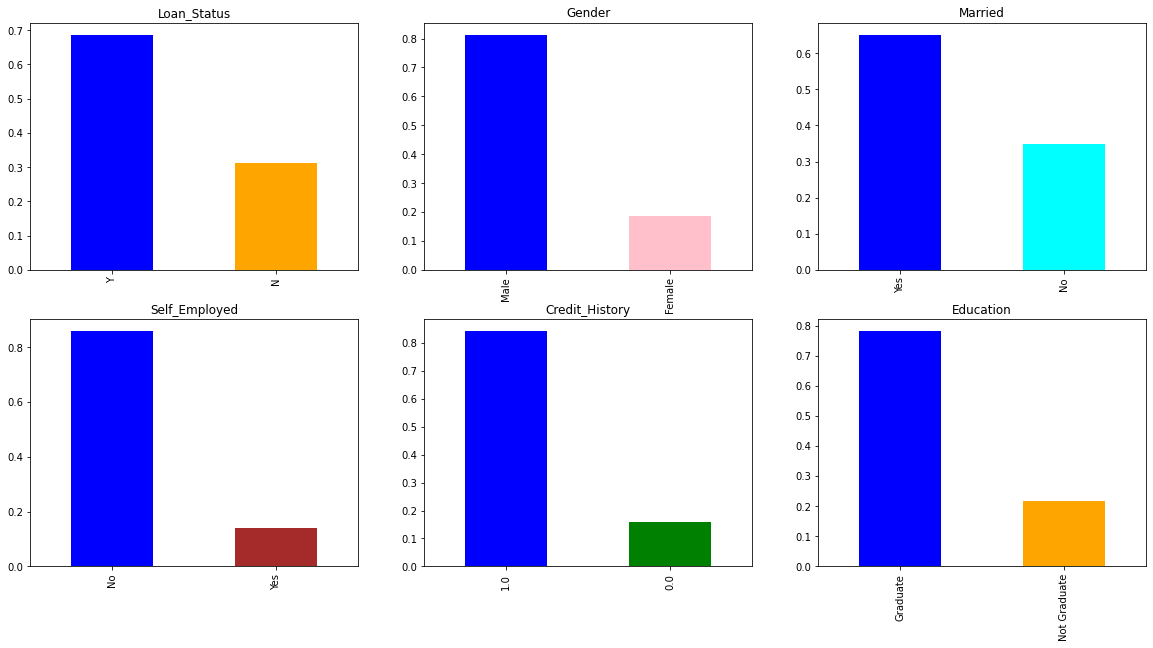

In [8]:
dataObject.generateNominalAttributesReport()

***Observation from output:***  
422 applicant's loan application is approved out of 614 applicants and 192 loan applications were rejected out of 614 applicants. There is no imbalanced classes in the dataset.Thus **"accuracy"** as an evaluation metric should be appropriate  

- 80% are Male Applicants  
- 65% are Married Applicants  
- 15% are Self_Employed Applicants  
- 85% Applicants are having good credit history  
- 80% Applicants are graduates  

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


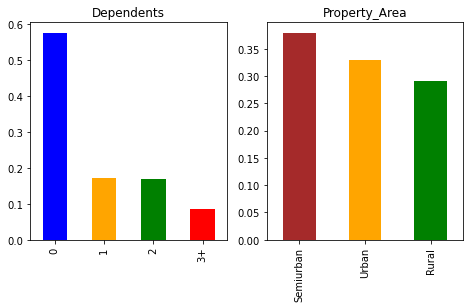

In [9]:
#independent ordinal variables(Dependents,Property_Area) 
dataObject.generateOrdinalAttributesReport()

***Observations from the output:***

- 56% of applicants are having no dependents
- Most of applicants are from semiUrban area

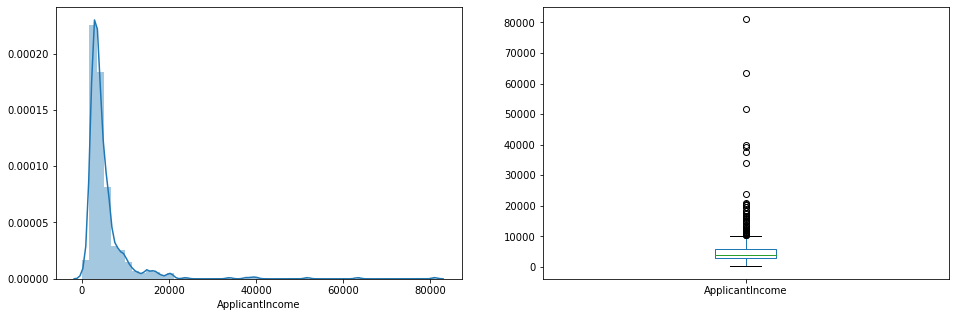

In [10]:
dataObject.generateNumereicAttributesReport('ApplicantIncome')

***Observations from the output:***  
- ApplicantIncome is mostly spread towards left end. The spread is right-skewed/positive-skewness. 
- Boxplot indicates presence of outliers. Income disparity could be due to different education levels.  
  So, let it be seggreated by education level

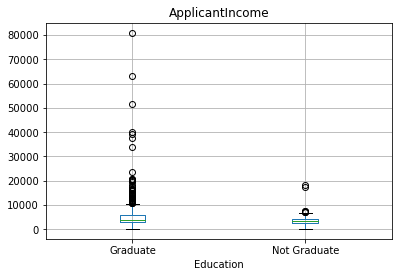

In [11]:
dataObject.segregateByEducation('ApplicantIncome')

***Observations from the output:***  
- Higher number of Graduates with higher education levels appear as outliers 

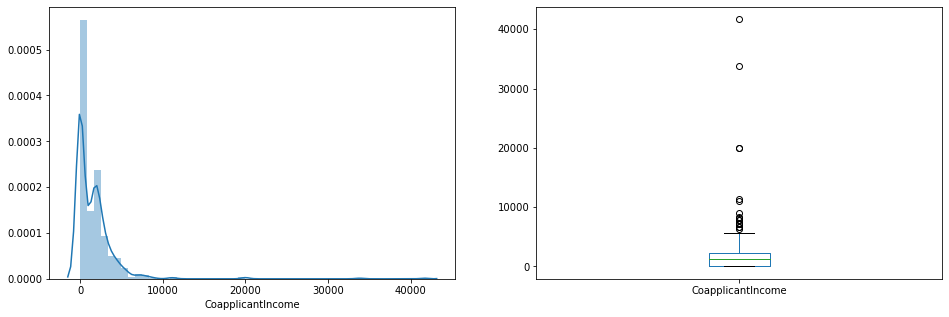

In [12]:
dataObject.generateNumereicAttributesReport('CoapplicantIncome')

***Observations from the output:*** 
- Most of coapplicant's income ranges[0,5000] and outliers exists

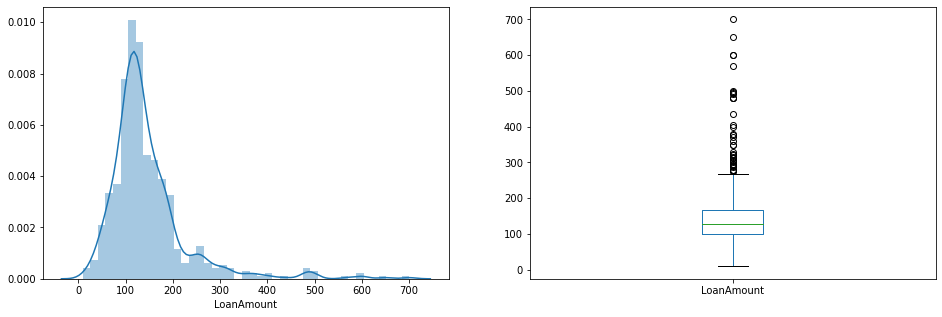

In [13]:
dataObject.generateNumereicAttributesReport('LoanAmount')

*Observations from the output:*  
- Even though distribution is normal, outliers exists 

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


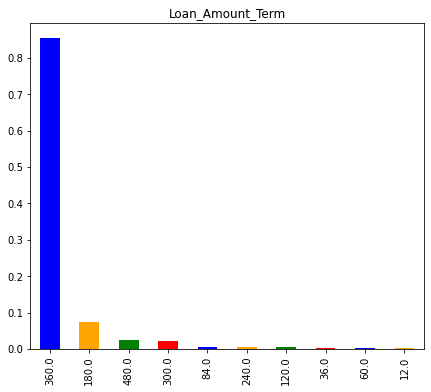

In [14]:
#loan term is Numeric but discrete variable so, bar plot is used for representation
plt.subplot(131)
generateSubGraphs('Loan_Amount_Term',trainDataSet,'blue','orange','green','red',24,6)
plt.show()

*Observations from the output:* 
-  512 loan are to be paid in 360 months i.e. 30 years. 

## **c) Identify relevant, irrelevant attributes for building model.** ##    

***Answer:***  
Bivarte Analysis technique can be used to correlate attributes with target variable. It helps us to find whether the attribute is related or irrevlant to target variable

**Bivariate Analysis:**
1. A stacked bar plot is used to represent the porpotion of approved loans and unapproved loans along with the relationships between target variable and categorical variables
2. Mean is also used along stacked bar plots for finding relationships between numerica variables and target variable


In [15]:
class BivariateAnalysis():
    
    newColumns=[]
    
    def __init__(self,trainDs):
        self.trainDs=trainDs
    
    #find the relationship between (gender variable- target variable),(Married variable -target variable), 
    #(self_Employed variable- target variable),(Education variable-target variable)
    def generateNominalAttributesReport(self):
        targetVariable='Loan_Status'
        for colIndex,colName in enumerate(nominalAttributes[1:5], start=1):
            generateStackedBarGraphs(colName, targetVariable, self.trainDs)
        plt.show()
    
    def generateEducationAttributeReport(self):
        generateStackedBarGraphs('Education', 'Loan_Status', self.trainDs)
        plt.show()
    
    def generateOrdinalAttributesReport(self):
        targetVariable='Loan_Status'
        for colIndex,colName in enumerate(ordinalAttributes):
            generateStackedBarGraphs(colName, targetVariable, self.trainDs)
        plt.show()
        
    #find the relationship between Numeric variable Applicant Income and target variable, Loan_status
    def generateNumericAttribueReports(self, colName):
        attribute=self.trainDs.groupby('Loan_Status')[colName].mean().plot.bar(color=['blue', 'red'])
        plt.show()
    
    #binning techniques
    def createBins(self, bins, newColName, colName, grpIndex=4):
        group =['Low', 'Average', 'High', 'Very High']
        self.newColumns.append(newColName)
        self.trainDs[newColName]=pd.cut(self.trainDs[colName], bins, labels=group[:grpIndex])
        incomeBin=pd.crosstab(self.trainDs[newColName], self.trainDs['Loan_Status'])
        incomeBin.div(incomeBin.sum(1).astype(float), axis=0).plot(kind="bar", color=['red','green'], stacked=True)
        plt.xlabel(colName)
        P=plt.ylabel('Percentage')
        plt.show()
    
    #converting dependents & loanAmount to numeric for matrix calculations
    def numericConversion(self):
        self.trainDs['Dependents'].replace('3+', '3', inplace=True)
        self.trainDs['Loan_Status'].replace('N', 0, inplace=True)
        self.trainDs['Loan_Status'].replace('Y', 1, inplace=True)
    
    #corelation Matrix generation using pearon's correlation coefficient
    def generateCorrelationMatrix(self):
        matrix=self.trainDs.corr(method='pearson')
        f,ax=plt.subplots(figsize=(9,6))
        sns.heatmap(matrix, vmax=1, square=True, cmap='BuPu', annot=True)
        matrix
    
    def displayNewColumns(self):
        for index, name in enumerate(self.newColumns):
            print(name, end=' ')
        print("\n")
        
    def removeNewColumns(self):
        self.trainDs=dataObjects.trainDs.drop(self.newColumns, axis=1)
        

In [16]:
dataObjects=BivariateAnalysis(trainDataSet)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378



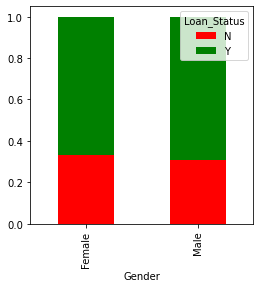

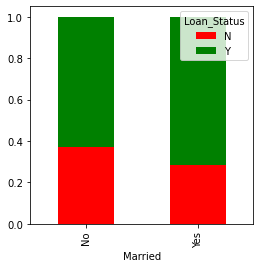

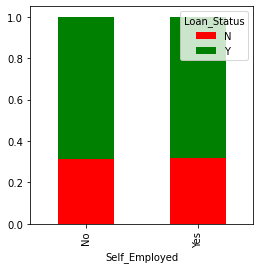

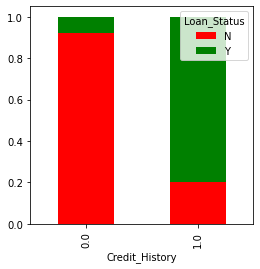

In [17]:
dataObjects.generateNominalAttributesReport()

*Observations from the output:*  
- Both Propotions of male and female applications is more or less same for both approved and unapproved loans 
- Propotion of married applicants is higher for approved loans
- No signficance can be infered from self_Employed attribute and Loan_Status target variable
- Applicants with credit history as 1 are having chances higher for loan approval

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82



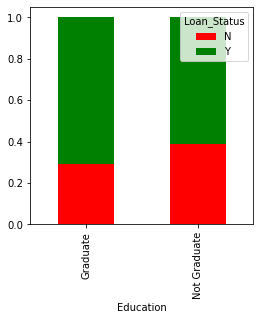

In [18]:
dataObjects.generateEducationAttributeReport()

*Observations from the output:*  
- Propotions of loans getting approved for graduates is higher as compared to non-graduates  

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133



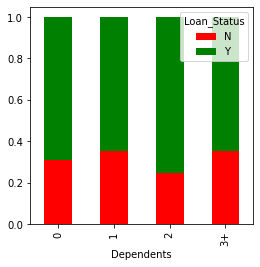

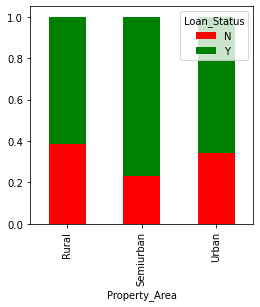

In [19]:
dataObjects.generateOrdinalAttributesReport()

*Observations from the output:*  
- Distribution for dependents ranging from 1 to 3+ is similar for both approved and unapproved loans
- Loans approved are more in SemiUrban area than rural & urban areas

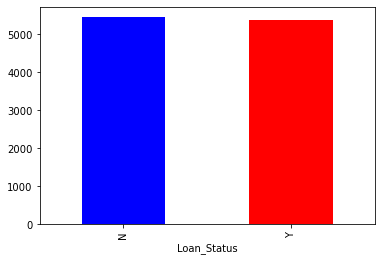

In [20]:
dataObjects.generateNumericAttribueReports('ApplicantIncome')

*Observation from output:*  
- The y-axis represents mean applicant income. 
  As there is not much change in the mean income, income bins needs to be generated based on applicant income values

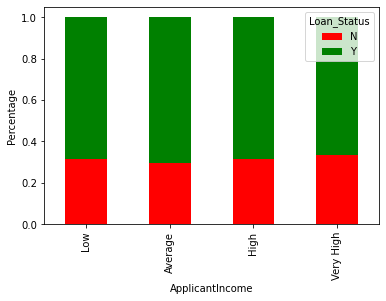

In [21]:
bins=[0,2500,4000,6000, 81000]
dataObjects.createBins(bins, 'Income_Bin', 'ApplicantIncome')

*Observation from output:*  
-  Applicant Income does not affect the chances of loan approval which contradicts the initial hypothesis assumptions
   i.e. if the applicant Income is high then chances of getting loan approval is also high

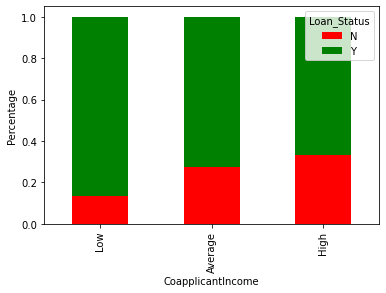

In [22]:
#find the relationship between Numeric variable Coapplicant Income and target variable, Loan_status
bins=[0,1000,3000,42000]
dataObjects.createBins(bins, 'coApplicant_Income_Bin', 'CoapplicantIncome',3)

*Observation from output:*  
-  Even though it seems Coapplicant Income is low then chances of loan approval are high. It is wrong as most applicants don't    have a coapplicants, so income for such coapplicants is marked 0.Therefore, loan approval is not dependent on coapplicant      income

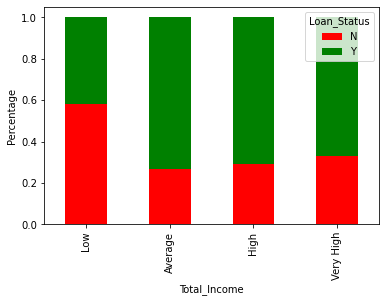

In [23]:
#to validate the hypothesis assumption, create a new combinedIncome variable by adding Applicant and coapplicantIncome
dataObjects.trainDs["Total_Income"]= dataObjects.trainDs['ApplicantIncome']+dataObjects.trainDs['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
dataObjects.createBins(bins, 'Total_Income_Bin', 'Total_Income')

*Observations from output:*  
- The observation mathces the hypothesis assumption that applicants with low total income is have lower chances for getting a loan approved as compared to chances for applicant in Average, High and Very High total income groups 

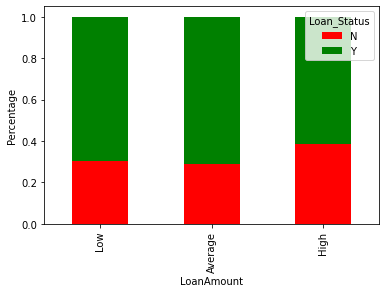

In [24]:
#find the relationship between Numeric variable Loan Amount and target variable, Loan_status
bins=[0,100,200,700]
dataObjects.createBins(bins, 'LoanAmount_bin', 'LoanAmount', 3)

*Observations from output:*  
- The observation mathces the hypothesis assumption that applicants with lower and average loan amounts have higher chances for getting a loan approved as compared to chances for applicant with High loan Amount 

In [25]:
print("Before Droping\n") 
dataObjects.displayNewColumns()
dataObjects.trainDs.head()

Before Droping

Income_Bin coApplicant_Income_Bin Total_Income_Bin LoanAmount_bin 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,coApplicant_Income_Bin,Total_Income,Total_Income_Bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [26]:
#drop the created bins
dataObjects.removeNewColumns()
dataObjects.trainDs= dataObjects.trainDs.drop(['Total_Income'], axis=1)
print("After Droping\n")
dataObjects.trainDs.head()

After Droping



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
#convert the dependents to numeric variable by replacing 3+ with 3
dataObjects.numericConversion()
dataObjects.trainDs.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0


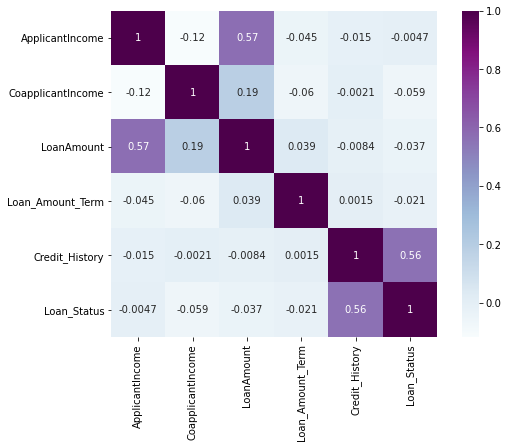

In [28]:
#calculate the correlation matrix using pearson coefficent method
dataObjects.generateCorrelationMatrix()

*Observations from output:*  
- The mostly correlated attributes are:
  - ApplicantIncome is correlated to LoanAmount -with pearson correaltion coefiicient of 0.57 
  - CreditHistory is correlated to Loan_Status - with pearson correlation coefficient of 0.56
  - Loan_Amount is also correlated to Coapplicant Income - with pearson correlation coefficient of 0.19

## **d) Perform appropriate data transformations with justifications** ##  

***Answer:***
The process performing data transformations to convert raw data into understandable data is a part of Data preprocessing step
The techniques used for data transformations
- Identifying and handling missing value
- Identifying and handling outlier analysis

In [29]:
trainDataSet = dataObjects.trainDs.copy()
trainDataSet.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [30]:
#list out feature wise count of missing values as part of identifying missing values
trainDataSet.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*** Observations from the output:***
1. There are missing values in attributes: Gender,Married, Dependent, Self_Employed, Loan_Amount, Loan_Amount_Term and credit_History
2. There are less number of missing values in attributes :Gender, Married, Dependents , Loan_Amount, Loan_Amount_Term as compared to number of missing values in attributes Self_Employed and credit History.


In [31]:
#handling missing values - for categorical missing values fill with mode value 
#and for numnerical missing values fill with mean or mode
missingValAttributes = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History', 'Loan_Amount_Term']

def replaceWithMode(trainDs):
    for index, element in enumerate(missingValAttributes):
        trainDs[element].fillna(trainDs[element].mode()[0], inplace=True)

def replaceWithMedian(trainDs):
    #loan amount will be replaced with median due to presence of outliers
    trainDs['LoanAmount'].fillna(trainDs['LoanAmount'].median(), inplace=True)


trainDs = trainDataSet.copy()
replaceWithMode(trainDs)
print(trainDs.isnull().sum(), end="\n\n")
replaceWithMedian(trainDs)
print(trainDs.isnull().sum(), end="\n\n")


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64



***observations from the ouput:***  
- Missing values are replaced accordingly with mode and median values successfully

**Outlier Treatment**  
Loan Amount is right skewed or exhibits positive-skewness because of presence of ouliers.  
Log transformations can be used to remove skewness. It will not impact small values but reduce large values to achieve a graph similar to normal distribution

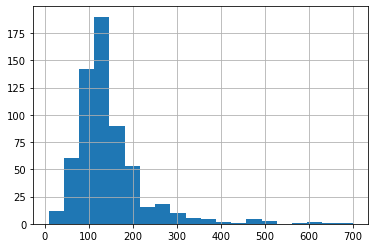

In [32]:
#before Log Transformations
trainDs['LoanAmount'].hist(bins=20)

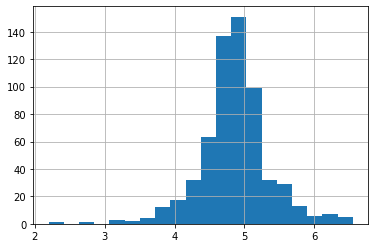

In [33]:
#after log transformations
trainDsLog= trainDs.copy()
trainDsLog['Loan_Amount_log']=np.log(trainDsLog['LoanAmount'])
trainDsLog['Loan_Amount_log'].hist(bins=20)

## **e)Generate new features if needed** ##  
 
***Answer:***  
Based on the bivariate Analysis, three new feature were identified , namely:  
- Total Income : This feature is obtained by combining Applicant Income with Coapplicant Income. If total income is high chances of getting a loan approval is also high  

- EMI : Amount to be repayed monthly. The idea is to understand whether an applicant will be able to pay high EMIs monthly for higher loan amounts. EMI can be obtained by ratio of loan amount w.r.t loan term  

- Balance Amount: The idea is if the balance amount is less then there are chances that applicant will repay quickly. 

In [34]:
#create new Variables
trainDsNewFeatures=trainDs.copy()

class AddNewFeatures():
    
    def __init__(self,trainDs):
        self.trainDs=trainDs
        
    def getTotalIncomeReport(self):
        self.trainDs['Total_Income']=self.trainDs['ApplicantIncome']+self.trainDs['CoapplicantIncome']
        generateDistplot('Total_Income', self.trainDs, 'Total Income')
        
    def getTotalIncomeLogReport(self):
        #Apply log trasnsoformations
        self.trainDs['Total_Income_Log'] = np.log(self.trainDs['Total_Income'])
        generateDistplot('Total_Income_Log', self.trainDs, 'Total Income After Log Transformation')
        
    def getEMIReport(self):
        self.trainDs['EMI']= self.trainDs['LoanAmount']/self.trainDs['Loan_Amount_Term']
        generateDistplot('EMI', self.trainDs, 'EMI')
    
    def getBalanceIncomeReport(self):
        self.trainDs['Balance_Income']= self.trainDs['Total_Income']-(self.trainDs['EMI']*1000)
        generateDistplot('Balance_Income', self.trainDs, 'Balance Income')


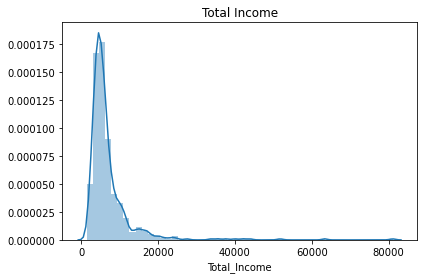

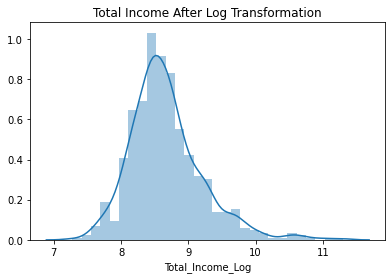

In [35]:
featureObjects = AddNewFeatures(trainDsNewFeatures)
featureObjects.getTotalIncomeReport()
featureObjects.getTotalIncomeLogReport()

*** Observation from output:***  
As train histogram for total Income right-skewed/positively-skewed , applying log transformations has set histogram similar to normal distribution 

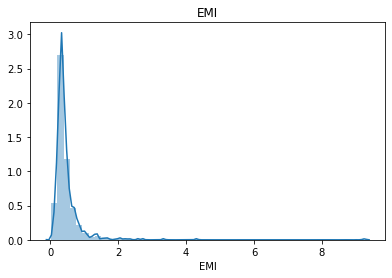

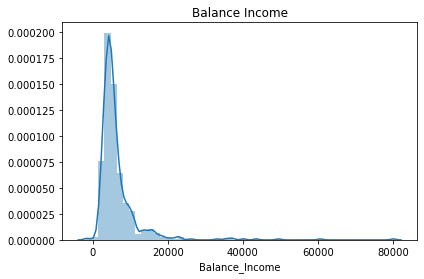

In [36]:
featureObjects.getEMIReport()
featureObjects.getBalanceIncomeReport()

## **g)Evaluate the solutions** ##  

There exists 4 solutions to solve the problem:
  - Decision Trees
  - RadomForest
  - Logistic Regression

***Decsion Tree:***
The first solution is evaluting a decision tree classifier

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems.  
The population or sample is split into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


traindt=trainDs.copy()
train_ds_encoded = pd.get_dummies(traindt,drop_first=True)
train_ds_encoded.head()

########## Split Features and Target Varible ############
X = train_ds_encoded.drop(columns='Loan_Status')
y = train_ds_encoded['Loan_Status']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

treeModel = DecisionTreeClassifier()
treeModel.fit(X_train,y_train)
y_pred = treeModel.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(treeModel,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(treeModel,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6574366967060151
Validation Mean Accuracy:  0.7413729128014841


The Training Accuracy > Test Accuracy with default settings of Decision Tree classifier.  
Hence, model is overfit. So use Hyper-parameter tuning like max depth ='3'and see if it helps.   

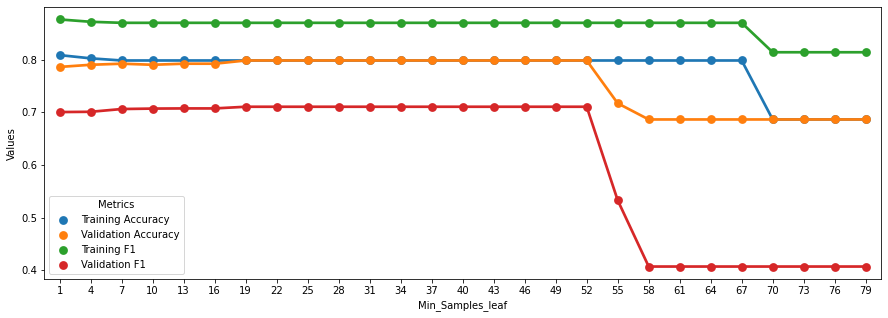

In [38]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [39]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.  
Random Forest Classifier can reduce mis-classifications

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8140096618357487
Train Accuracy  0.6863543788187373
Validation Mean F1 Score:  0.4070012002282401
Validation Mean Accuracy:  0.686353329210472


In [41]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6910569105691057
Test F1 Score:  0.8173076923076924
Confusion Matrix on Test Data


Predicted,1,All
True,,
0,38,38
1,85,85
All,123,123


 - ***Logistic Regression:*** - A classification algorithm used to predict the binary outcome for a given set of independent variables.It uses a logit function that generates a s-shaped curve with the probability estimate similar to stepwise function

In [42]:
trainDsLog.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,4.553877
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,5.062595


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The accuracy of predictions is 82.70270270270271%

The classification report is:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        51
           1       0.82      0.97      0.89       134

    accuracy                           0.83       185
   macro avg       0.84      0.71      0.74       185
weighted avg       0.83      0.83      0.81       185


confusion Matrix is:
 [[ 23  28]
 [  4 130]]



Text(33.0, 0.5, 'True')

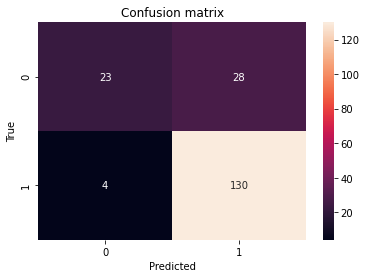

In [44]:
#Logistic Regression
train =trainDsLog.copy()

train = train.drop('Loan_ID', axis=1)
X=train.drop('Loan_Status', 1)
X=pd.get_dummies(X)
train= pd.get_dummies(train)
Y=train.Loan_Status

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model=LogisticRegression()
model.fit(x_train,y_train)

predictions=model.predict(x_test)
val=(accuracy_score(y_test, predictions)*100)
print("The accuracy of predictions is {}%".format(val), end="\n\n")

print("The classification report is:\n", classification_report(y_test, predictions), end="\n\n")

cmatrix=confusion_matrix(y_test, predictions)
print ("confusion Matrix is:\n", cmatrix, end="\n\n")

sns.heatmap(cmatrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

***Observations from output:***  

After observing all three confusion matrices and testing 3 different algorithms, the conclusion is the best accuracy is achieved by Logistic Regression, followed by RandomForest and Decision Tree performed the worst. 

## **h) Look for refinement opportunities** ## 

***Answer:***  
There are many things that can be tried to improve the models’ predictions. 
- create and add more variables, 
- try different models with different subset of features and/or rows, etc.
- Combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
- Make independent vs independent variable visualizations to discover some more patterns.
- Arrive at the EMI using a better formula which may include interest rates as well.
- Try ensemble modeling (combination of different models). More about ensemble techniques can be found at the references.
- Try neural network using Tensorflow or PyTorch